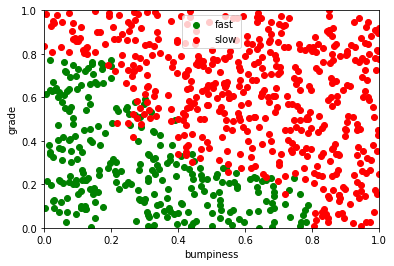

start


In [1]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

%matplotlib inline 

#import sys
from time import time
#sys.path.append("../tools/")
#from email_preprocess import preprocess


features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "g", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################
print "start"


2
Training time: 0.243 s
Predicting time: 0.016 s
accuracy:  0.924
Accuracy scoring time: 0.0 s


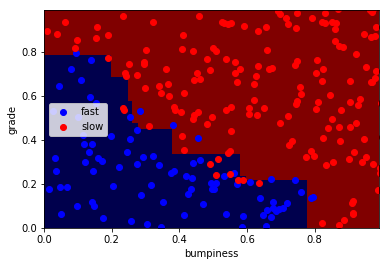

In [3]:

### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary
print len(features_train[0])

from sklearn.ensemble import AdaBoostClassifier

t0 = time()
clf = AdaBoostClassifier(n_estimators=100,learning_rate=0.2)
clf.fit(features_train, labels_train)
print "Training time:", round(time()-t0, 3), "s"

t1 = time()
pred = clf.predict(features_test)
print "Predicting time:", round(time()-t1, 3), "s"

from sklearn.metrics import accuracy_score
accuracy= accuracy_score(pred, labels_test)
t2 = time()

print "accuracy: ", accuracy
print "Accuracy scoring time:", round(time()-t2, 3), "s"



try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass
